In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import nept

In [71]:
def speed_threshold(position, thresh, direction):
    """Finds the epochs where speed is greater or lesser than a threshold.
    
    Parameters
    ----------
    position: nept.Position
    thresh: float
    direction: str
        Must be "greater" or "lesser"
    
    Returns
    -------
    nept.Epoch
    """
    speed = position.speed()
    if direction == "greater":
        changes = np.diff(np.hstack(([0], (np.squeeze(speed.data) >= thresh).astype(int))))
    elif direction == "lesser":
        changes = np.diff(np.hstack(([0], (np.squeeze(speed.data) <= thresh).astype(int))))
    else:
        raise ValueError("Must be 'lesser' or 'greater'")

    starts = np.where(changes == 1)[0]
    stops = np.where(changes == -1)[0]

    if len(starts) != len(stops):
        assert len(starts) - len(stops) == 1
        stops = np.hstack((stops, position.n_samples - 1))

    if starts[-1] == stops[-1]:
        print("Last sample not included in speed thresholding")
        starts = starts[:-1]
        stops = stops[:-1]

    data = np.vstack([position.time[starts], position.time[stops]]).T
    return nept.Epoch(data)


def run_threshold(position, thresh):
    return speed_threshold(position, thresh, direction="greater")
    

def rest_threshold(position, thresh):
    return speed_threshold(position, thresh, direction="lesser")

In [76]:
times = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
data = np.array([0.0, 0.5, 1.0, 0.7, 1.7, 2.0])

position = nept.Position(data, times)

run_epoch = run_threshold(position, thresh=0.4)
rest_epoch = rest_threshold(position, thresh=0.4)

# assert np.allclose(run_epoch.starts, np.array([2., 5.]))
# assert np.allclose(run_epoch.stops, np.array([3., 6.]))

Last sample not included in speed thresholding


In [77]:
run_epoch.starts, run_epoch.stops

(array([1., 4.]), array([3., 5.]))

In [78]:
rest_epoch.starts, rest_epoch.stops

(array([0., 3.]), array([1., 4.]))

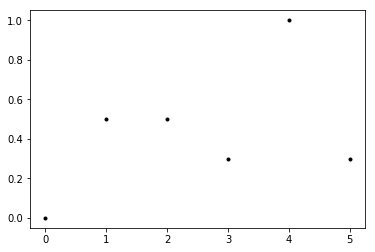

In [79]:
speed = position.speed()

plt.plot(speed.time, speed.data, "k.")
plt.show()

In [40]:
ep = rest_thresh(position, thresh=0.4)
print(ep.starts, ep.stops)

[0. 3.] [1. 4.]


In [12]:
ep = run_thresh(position, thresh=0.4)
print(ep.starts, ep.stops)

[1. 4.] [3. 5.]


In [22]:
data = np.array([1., 1.2, 1.4, 8.6, 8.5, 8.4, 3.3, 3.4, 3.3, 1.2])
time = np.arange(0, 10)
position = nept.Position(data, time)

running = run_thresh(position, thresh=1)

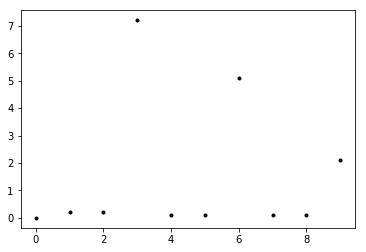

In [23]:
speed = position.speed()

plt.plot(speed.time, speed.data, "k.")
plt.show()

In [25]:
running.starts, running.stops

(array([3., 6.]), array([4., 7.]))

In [26]:
yy = position[running]

In [29]:
yy.data, yy.time

(array([[8.6],
        [8.5],
        [3.3],
        [3.4]]), array([3., 4., 6., 7.]))

In [28]:
assert np.allclose(yy.data, np.array([[1.2],[1.4],[8.6],[3.3],[3.4],[3.3],[1.2]]))

ValueError: operands could not be broadcast together with shapes (4,1) (7,1) 